# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?
   * We take the overall dataset, then split that root node of all into different features in the same category. For example, if we have ice cream as the overall dataset, we could split this topic into flavors to have children nodes of "vanilla", "chocolate", or "strawberry". Then, we could take something like "chocolate" and split it into "chunky" or "not chunky" in terms of texture. This continues until we have a tree of distinct categorization that we're "happy" with.

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 
   * Trees handle categorical variables better as they consider all features instead of assuming a linear relationship between independent and target variables. Linear models do assume a linear relationship and attempt to find this "linear" property between variables, which doesn't do well to capture the nuances of each category as individuals.

3. Why is the Gini a good loss function for categorical target variables? 
   * The Gini's binary system of 0's to 1's is a good fit for categorical splits between 2 subcategories. The Gini is more sensitive to higher frequency groups and will determine within higher frequency groups if there is a good split using inequalities. The Gini will "stop" dividing groups into subcategories once all dataset values appear to be nicely represented in the last category, also tested using the binary inequalities. It's a good loss function to determine when to split or not on binary categories.

4. Why do trees tend to overfit, and how can this tendency be constrained? 
   * Trees tend to overfit as they make splits specific to the testing dataset. if there's an ultra specific split while using the Gini function on a dataset, new subcategories will form, which may or may not be relevant to other datasets. This tendency can be constrained by limiting how many leaf nodes the model can produce, or even limiting the depth the tree can grow to. I don't know if this is possible but we could use dynamic programming if we're programming this model to backtrack and find the "best" fit tree for a generalized dataset.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 
   * Trees don't only perform well with categorical variables. They also perform well with continuous variables. Instead of using the 'yes', 'no', or 'maybe' answers in a tree to determine subgroups, we can also use '>30' or '<40' in our decisions for continuous numbered categories.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
   * At a certain point, if you allow more than 2 branch splits, you could end up with a subcategory of more than 10 splits for continuous variables. It can also become very complicated to track backwards if there are multiple paths a computer can sort a point under (computationally expensive).

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
   * One can use the testing dataset to see how well the model performs on the new data. Cross-validation is also good in determining fit due to checking sensitivity and specificity of the outcomes.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
bc_df = pd.read_csv('./data/Breast Cancer METABRIC.csv')

print("There are", bc_df.shape[0], "observations and", bc_df.shape[1], "variables.")

print(bc_df.head())

There are 2509 observations and 34 variables.
  Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2    MB-0005             48.87             Mastectomy  Breast Cancer   
3    MB-0006             47.68             Mastectomy  Breast Cancer   
4    MB-0008             76.97             Mastectomy  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           No   
1           Breast Invasive Ductal Carcinoma        High           No   
2           Breast Invasive Ductal Carcinoma        High          Yes   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   

  Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
0         

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

In [34]:
eda_bc_df = bc_df[['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis', 'Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']]

tumor_stage_dummy = pd.get_dummies(eda_bc_df['Tumor Stage'], drop_first=True)
chemotherapy_dummy = pd.get_dummies(eda_bc_df['Chemotherapy'], drop_first=True)
cancer_type_dummy = pd.get_dummies(eda_bc_df['Cancer Type Detailed'], drop_first=True)

X = pd.concat([eda_bc_df[['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']], tumor_stage_dummy, chemotherapy_dummy, cancer_type_dummy], axis=1)
X.insert(0, 'Intercept', 1.0)

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

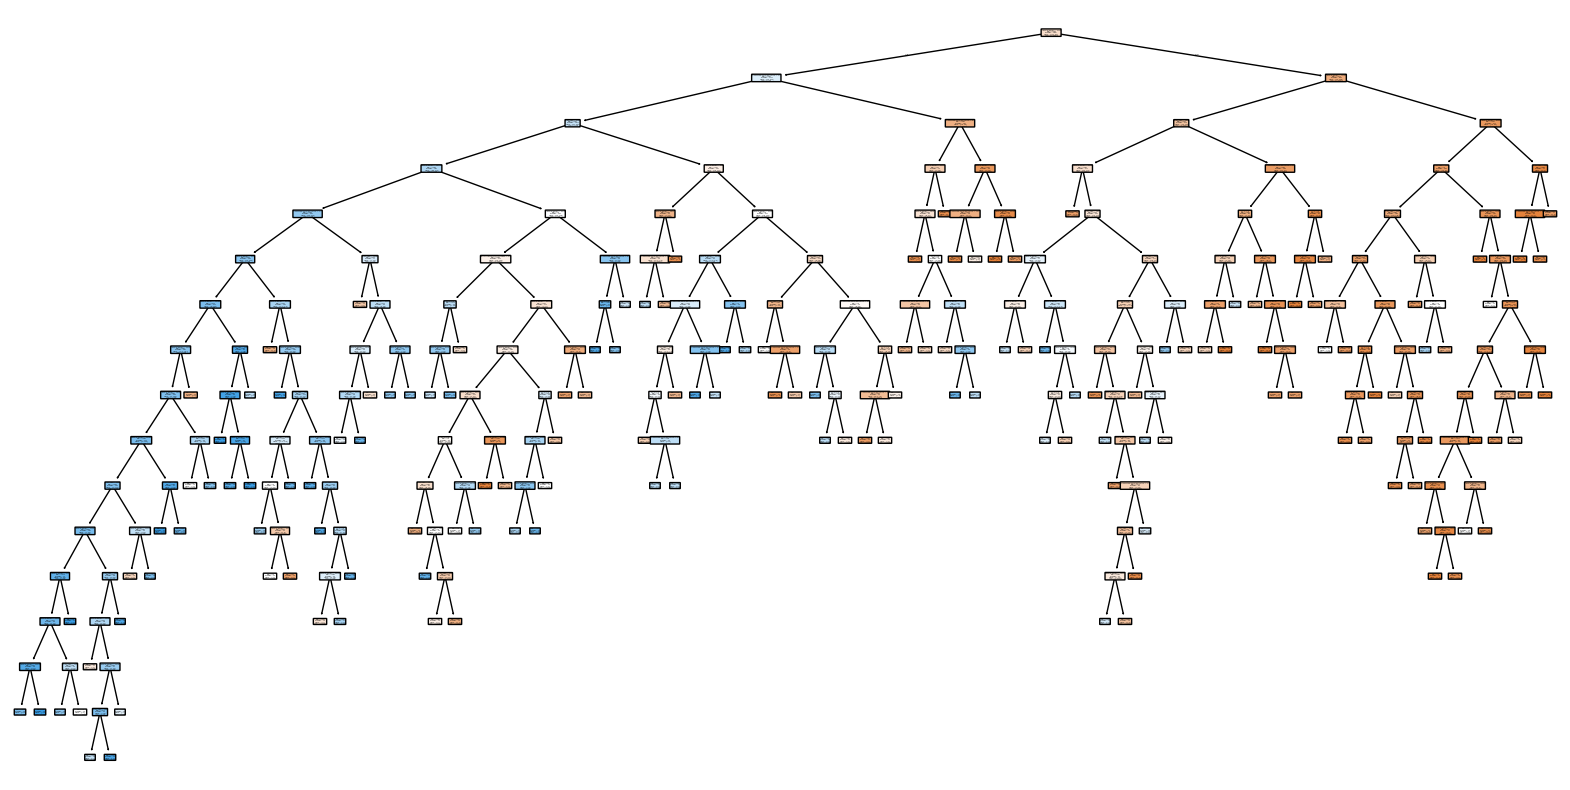

Accuracy:  0.7531549722362443 



col_0,0,1
row_0,,
0,936,208
1,281,556


In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


# i dropped the nan rows for Overall Survival Status since it appeared to not "contribute" to the code if we kept them
bc_df_clean = bc_df.dropna(subset=['Overall Survival Status'])
X_cleaned = X.loc[bc_df_clean.index]

y = bc_df_clean['Overall Survival Status'].values
# print(bc_df_clean['Overall Survival Status'].isna().sum())



X_cleaned.columns = X_cleaned.columns.astype(str)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

cart = DecisionTreeClassifier(min_samples_leaf=10)
cart = cart.fit(X_cleaned, y_encoded)

# Visualize the decision tree
var_names = X_cleaned.columns  # Get feature names from the DataFrame
plt.figure(figsize=(20, 10))  # Set figure size for better readability
plot_tree(cart, filled=True, feature_names=var_names, class_names=label_encoder.classes_, rounded=True)
plt.show()  # Show the plot



y_hat = cart.predict(X_cleaned)

tab = pd.crosstab(y_encoded,y_hat) 
acc = np.trace(tab)/len(y_encoded)
print('Accuracy: ', acc, '\n')

pd.crosstab(y_encoded,y_hat)


4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

In [47]:
TPR = tab.loc[1, 1] / (tab.loc[1, 1] + tab.loc[0, 1])
TNR = tab.loc[0, 0] / (tab.loc[0, 0] + tab.loc[1, 0])

print("True positive rate:", TPR)
print("True negative rate:", TNR)

True positive rate: 0.7277486910994765
True negative rate: 0.7691043549712407


My model tends to perform more accurately with the true negative rate being higher compared to the True positive rate. This indicates that that the model is better at identifying negative cases correctly than it is at identifying positive cases

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the aoptimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

Best R²: 0.0482 with min_samples_leaf = 20


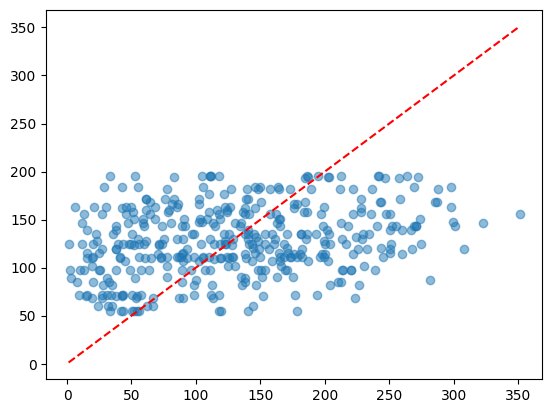

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

bc_df_clean = bc_df.dropna(subset=['Overall Survival (Months)'])
X_cleaned = X.loc[bc_df_clean.index]

y = bc_df_clean['Overall Survival (Months)'].values
# print(bc_df_clean['Overall Survival Status'].isna().sum())

X_cleaned.columns = X_cleaned.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned,y,test_size=.2,random_state=104)

best_r2 = -np.inf
best_min_samples_leaf = None
best_model = None

# Loop through a range of min_samples_leaf values
for min_samples in range(1, 21):  # You can adjust the range of `min_samples_leaf` values
    # Initialize the Decision Tree Regressor with the current `min_samples_leaf`
    cart = DecisionTreeRegressor(min_samples_leaf=min_samples)
    
    # Fit the model
    cart.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = cart.predict(X_test)
    
    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    
    # Keep track of the best model based on R²
    if r2 > best_r2:
        best_r2 = r2
        best_min_samples_leaf = min_samples
        best_model = cart

print(f"Best R²: {best_r2:.4f} with min_samples_leaf = {best_min_samples_leaf}")
y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

Im not confident in this mode because the values appear to not align in the prediction vs testing. The ideal line shown in red should have points mainly aligned with it, but they're mostly in a 'blob' horizontally and not forming any particular pattern.

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?